In [2]:
from __future__ import print_function

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from __future__ import division
pd.set_option('display.width',5000)

In [4]:
#load the bank_kaggle data
df = pd.read_csv('bank_full_1.csv')

In [5]:
#check the shape of the data
df.shape

(45211, 17)

In [6]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [73]:
#information about the data
# Input variables:
#    # bank client data:
#    1 - age (numeric)
#    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#                                        "blue-collar","self-employed","retired","technician","services") 
#    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#    4 - education (categorical: "unknown","secondary","primary","tertiary")
#    5 - default: has credit in default? (binary: "yes","no")
#    6 - balance: average yearly balance, in euros (numeric) 
#    7 - housing: has housing loan? (binary: "yes","no")
#    8 - loan: has personal loan? (binary: "yes","no")
#    # related with the last contact of the current campaign:
#    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
#   10 - day: last contact day of the month (numeric)
#   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   12 - duration: last contact duration, in seconds (numeric)
#    # other attributes:
#   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#   15 - previous: number of contacts performed before this campaign and for this client (numeric)
#   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#   Output variable (desired target):
#   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 8. Missing Attribute Values: None

EDA focus on: 1. Whether a feature is leaky. We don't want to include data that's only available in the feature.
2. How well the data differentiate under the feature. 
3. Whether it overlaps with other features.

In [10]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

Most of the the pdays has value -1, means the person hasn't been contacted before. We could potentially bin the data into two groups, -1 and not -1, but that overlaps with previous contact number. Overall, pdays is not a useful feature to keep.

In [13]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Average age is 41, and the youngest is 18 and oldest is 95. Bining the age help to simiplify the model. 
Bins were created with 10 as smallest, 100 as biggest and 10 as interval. For example, bins 10-19 will be labeled as 10, 
if a person is 18, the bin is 10.

In [15]:
bins = np.arange(10,110,10)
labels = np.arange(10,110,10)[:len(bins)-1]
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

df_age = pd.crosstab(df.binned_age, df.y, margins=True)
df_age.reset_index(inplace = True)
df_age['percentage'] = df_age.yes/df_age.All*100

df_age = df_age.iloc[:9,:]
df_age.sort_values(by ='binned_age', inplace = True)
df_age

y,binned_age,no,yes,All,percentage
5,10,417,284,701,40.513552
3,20,10220,1019,11239,9.066643
2,30,15875,1812,17687,10.244813
1,40,5821,1112,6933,16.039233
0,50,64,33,97,34.020619
4,60,7256,811,8067,10.053304
7,70,54,38,92,41.304348
6,80,213,175,388,45.103093
8,90,2,5,7,71.428571


In [16]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,binned_age
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40


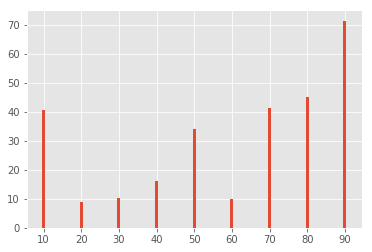

In [17]:
age_percentage_plot = plt.bar(df_age.binned_age, df_age.percentage)
#the yes rate vary quite a lot between different age grou

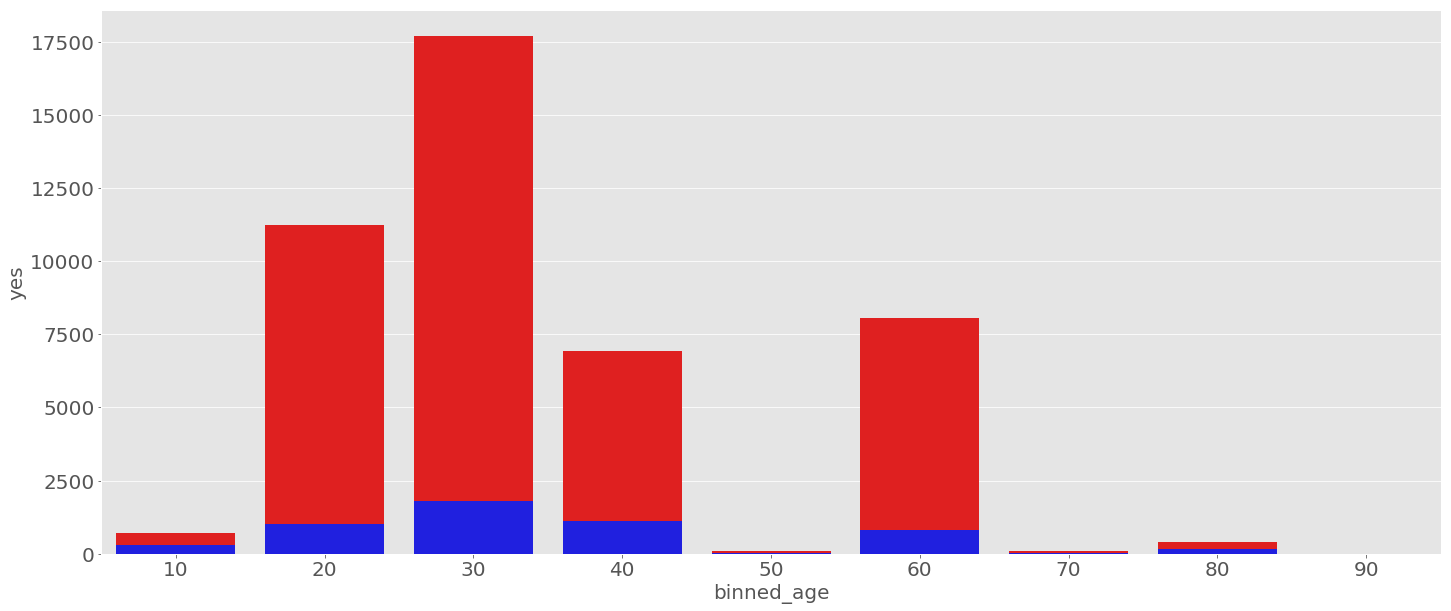

In [77]:
#create a stack bar to show the number of each age group and the number os yes in each age group
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_age['binned_age'], 
            y = df_age.All, color = "red")

age_plot = sns.barplot(x = df_age['binned_age'], 
            y = df_age.yes, color = "blue")

for item in ([age_plot.xaxis.label, age_plot.yaxis.label] +
             age_plot.get_xticklabels() + age_plot.get_yticklabels()):
    item.set_fontsize(20)


The majority of the people is in 30-40 age group, with 20-30 as second. 

In [18]:
#investigate the percentage of yes in each job catergory
df_job = pd.crosstab(df.job, df.y, margins=True)
df_job.reset_index(inplace = True)
df_job['percentage'] = df_job.yes/df_job.All*100
df_job

y,job,no,yes,All,percentage
0,admin.,4540,631,5171,12.202669
1,blue-collar,9024,708,9732,7.274969
2,entrepreneur,1364,123,1487,8.271688
3,housemaid,1131,109,1240,8.790323
4,management,8157,1301,9458,13.755551
5,retired,1748,516,2264,22.791519
6,self-employed,1392,187,1579,11.842939
7,services,3785,369,4154,8.883004
8,student,669,269,938,28.678038
9,technician,6757,840,7597,11.056996


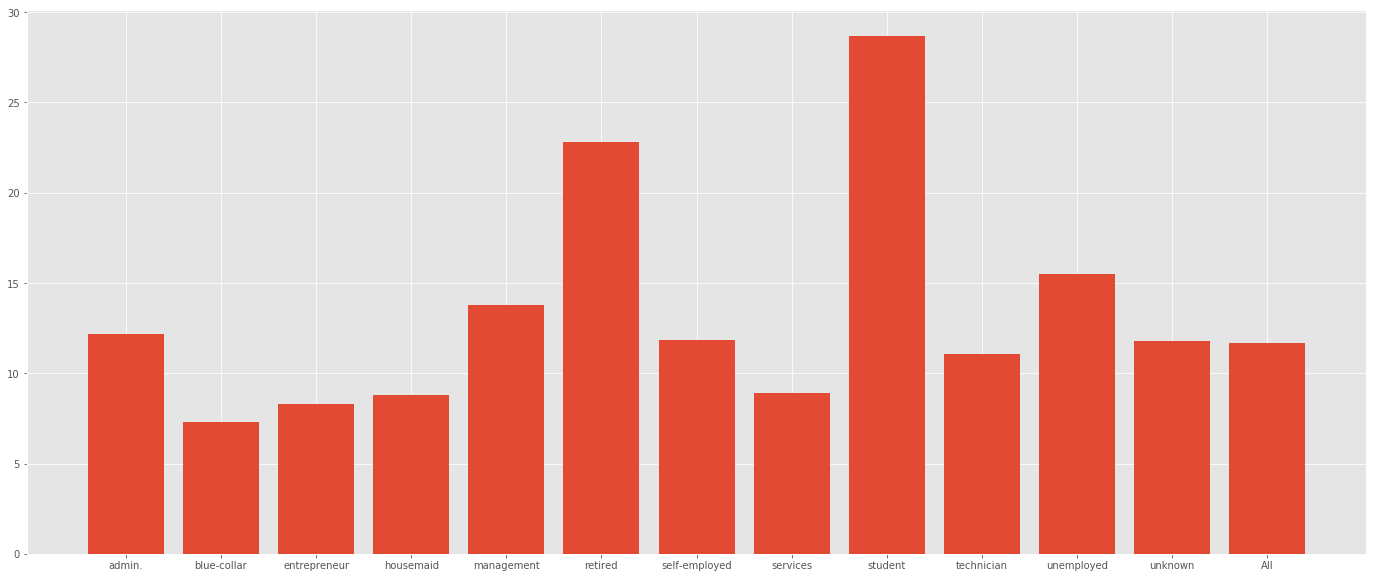

In [80]:
job_percentage_plot = plt.bar(df_job.job, df_job.percentage)

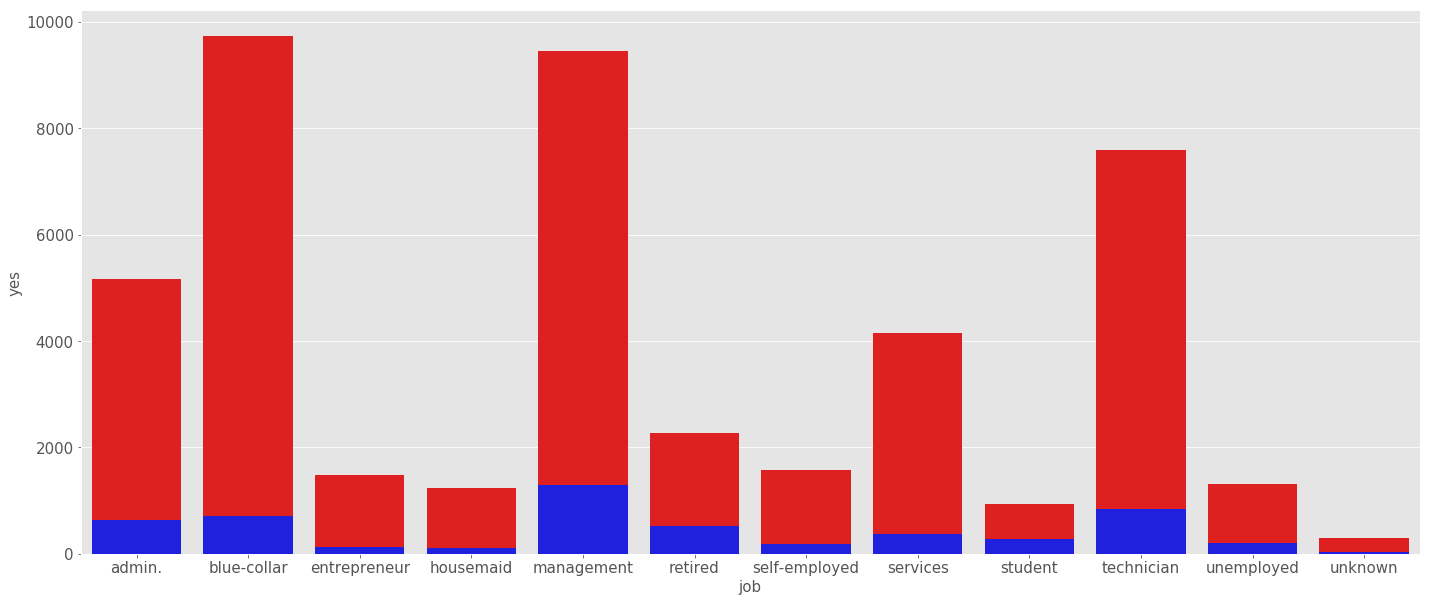

In [20]:
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_job['job'][:12], 
            y = df_job.All, color = "red")

job_plot = sns.barplot(x = df_job['job'][:12], 
            y = df_job.yes, color = "blue")

for item in ([job_plot.xaxis.label, job_plot.yaxis.label] +
             job_plot.get_xticklabels() + job_plot.get_yticklabels()):
    item.set_fontsize(15)
    
#yes rate vary quite a lot between different types of jobs, so job is an important feature

The percentage of yes varies quite a lot between different groups, 'retired' and 'student' stands out. But relatively there 
are not that many people come from those groups. Admin and management have very similar percentages, could potentially
combine. 

In [21]:
#investigate the percentage of yes in each marital catergory
df_marital = pd.crosstab(df.marital, df.y, margins=True)
df_marital.reset_index(inplace = True)
df_marital['percentage'] = df_marital.yes/df_marital.All*100
df_marital

y,marital,no,yes,All,percentage
0,divorced,4585,622,5207,11.945458
1,married,24459,2755,27214,10.123466
2,single,10878,1912,12790,14.949179
3,All,39922,5289,45211,11.698480


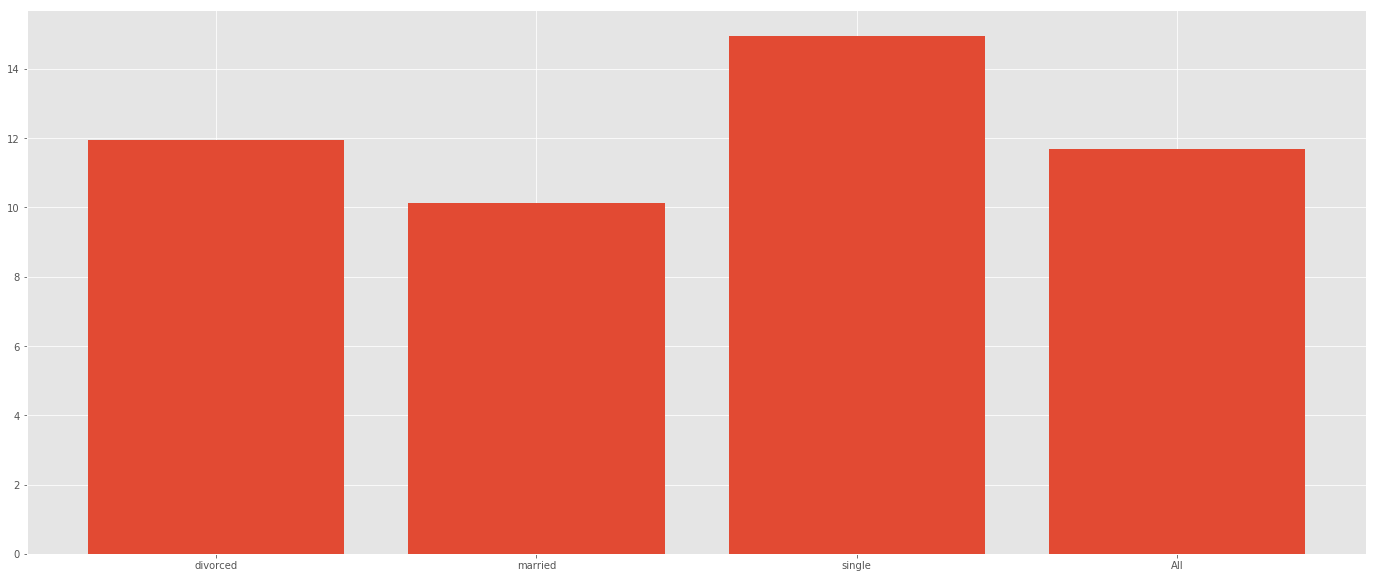

In [22]:
marital_percentage_plot = plt.bar(df_marital.marital, df_marital.percentage)

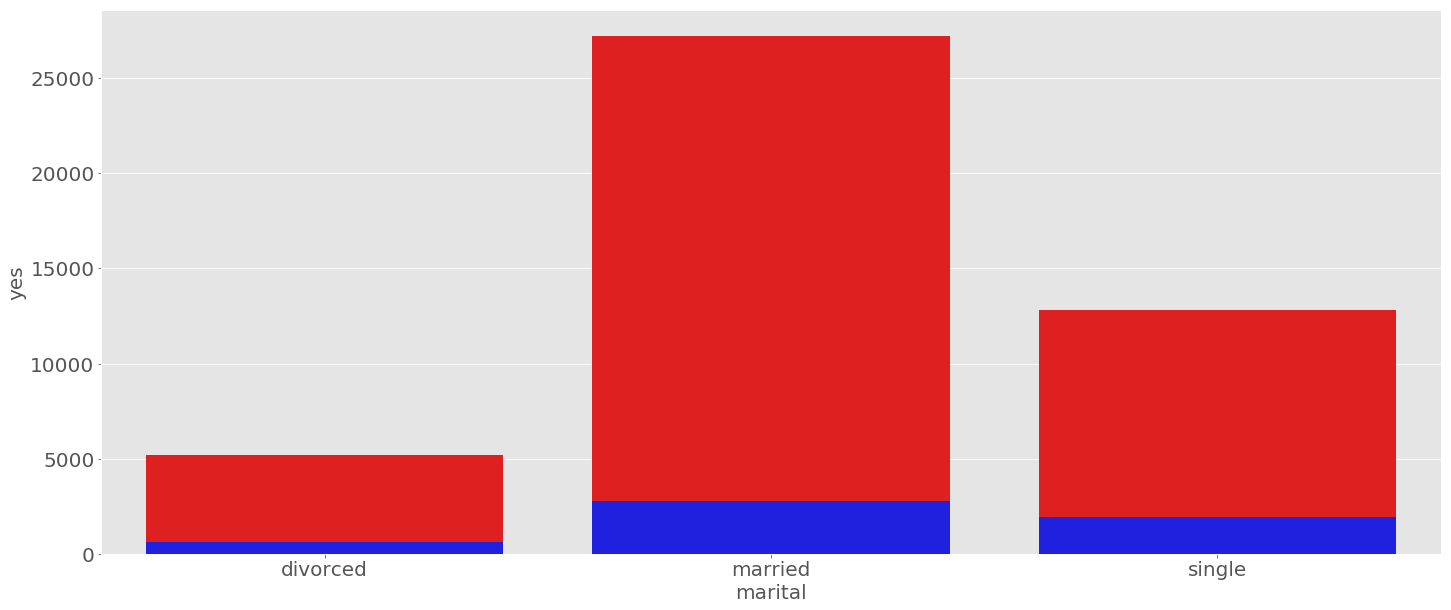

In [23]:
marital_percentage_plot = plt.bar(df_marital.marital, df_marital.percentage)
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_marital['marital'][:3], 
            y = df_marital.All, color = "red")

marital_plot = sns.barplot(x = df_marital['marital'][:3], 
            y = df_marital.yes, color = "blue")

for item in ([marital_plot.xaxis.label, marital_plot.yaxis.label] +
             marital_plot.get_xticklabels() + marital_plot.get_yticklabels()):
    item.set_fontsize(20)

#marital status did not vary much between conditions, maybe able to get rid of it

The percentage is not very different among the different maritial group. The majority of the people is married.

In [24]:
#investigate the percentage of yes in each job catergory
df_education = pd.crosstab(df.education, df.y, margins=True)
df_education.reset_index(inplace = True)
df_education['percentage'] = df_education.yes/df_education.All*100
df_education

y,education,no,yes,All,percentage
0,primary,6260,591,6851,8.626478
1,secondary,20752,2450,23202,10.559435
2,tertiary,11305,1996,13301,15.006390
3,unknown,1605,252,1857,13.570275
4,All,39922,5289,45211,11.698480


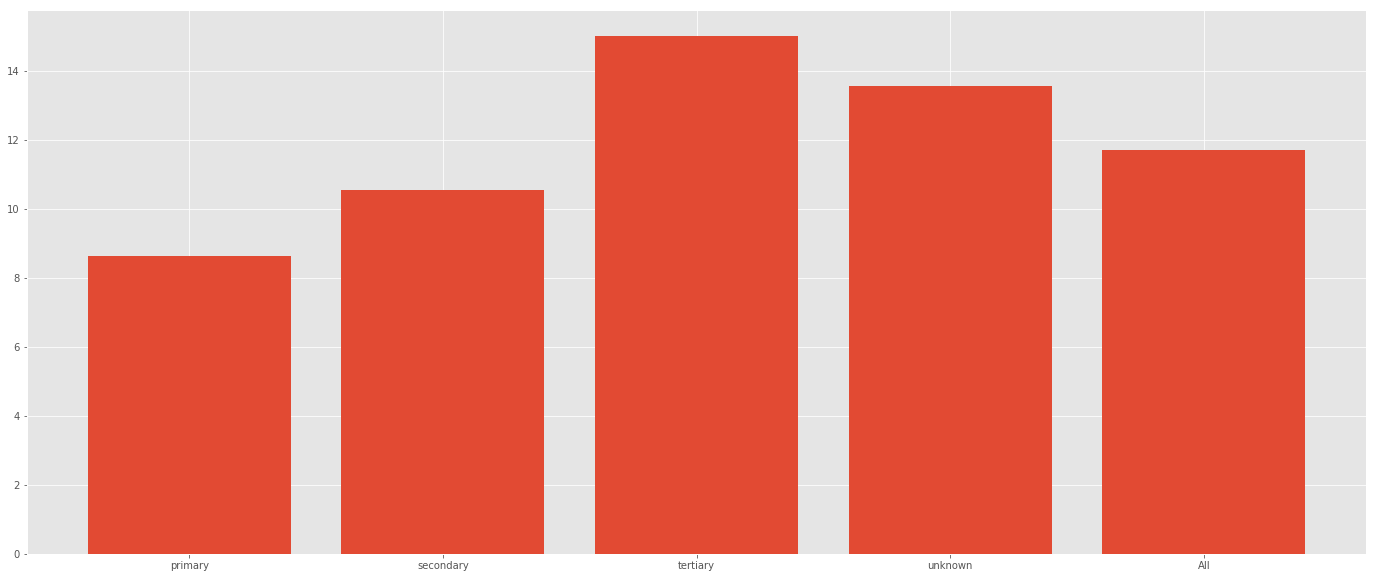

In [25]:
education_percentage_plot = plt.bar(df_education.education, df_education.percentage)

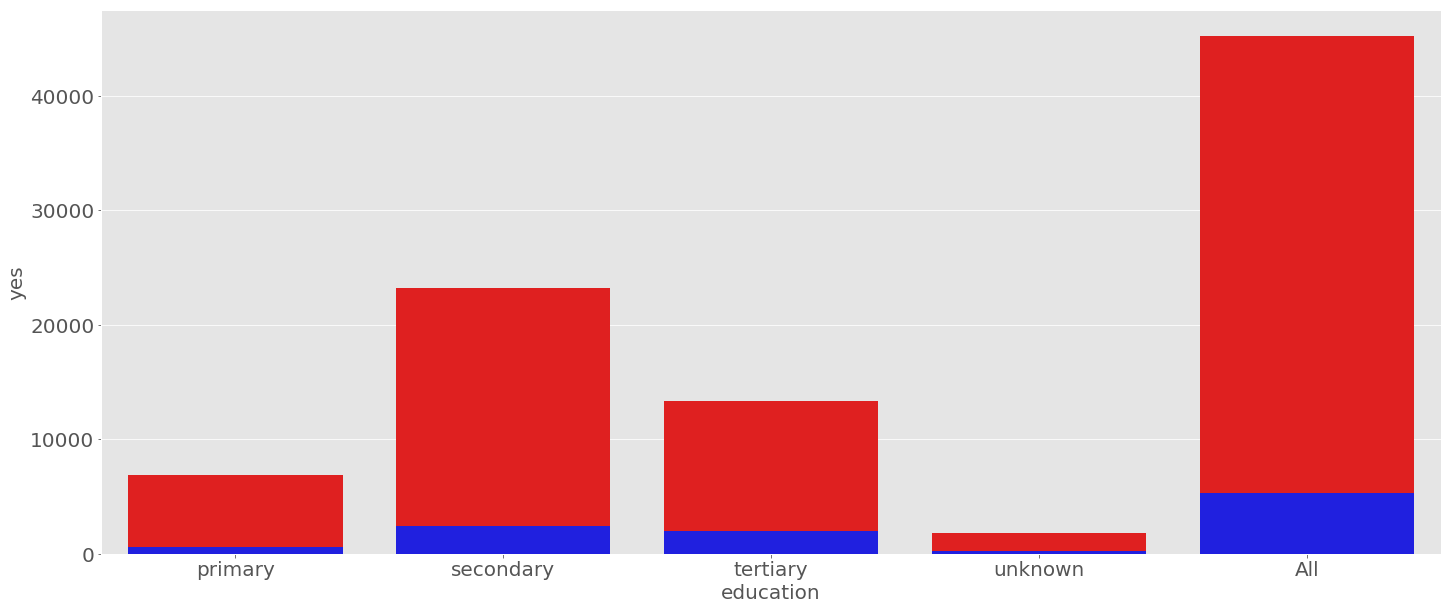

In [26]:
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_education['education'], 
            y = df_education.All, color = "red")

education_plot = sns.barplot(x = df_education['education'], 
            y = df_education.yes, color = "blue")

for item in ([education_plot.xaxis.label, education_plot.yaxis.label] +
             education_plot.get_xticklabels() + education_plot.get_yticklabels()):
    item.set_fontsize(20)

#the higher education, the higher percentage of yes

In [88]:
#investigate the percentage of yes in each default catergory
df_default = pd.crosstab(df.default, df.y, margins=True)
df_default.reset_index(inplace = True)
df_default['percentage'] = df_default.yes/df_default.All*100
df_default

y,default,no,yes,All,percentage
0,no,39159,5237,44396,11.796108
1,yes,763,52,815,6.380368
2,All,39922,5289,45211,11.698480


In [32]:
df.groupby('default').count()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,binned_age,binned_balance
default,,,,,,,,,,,,,,,,,,
no,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396
yes,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815


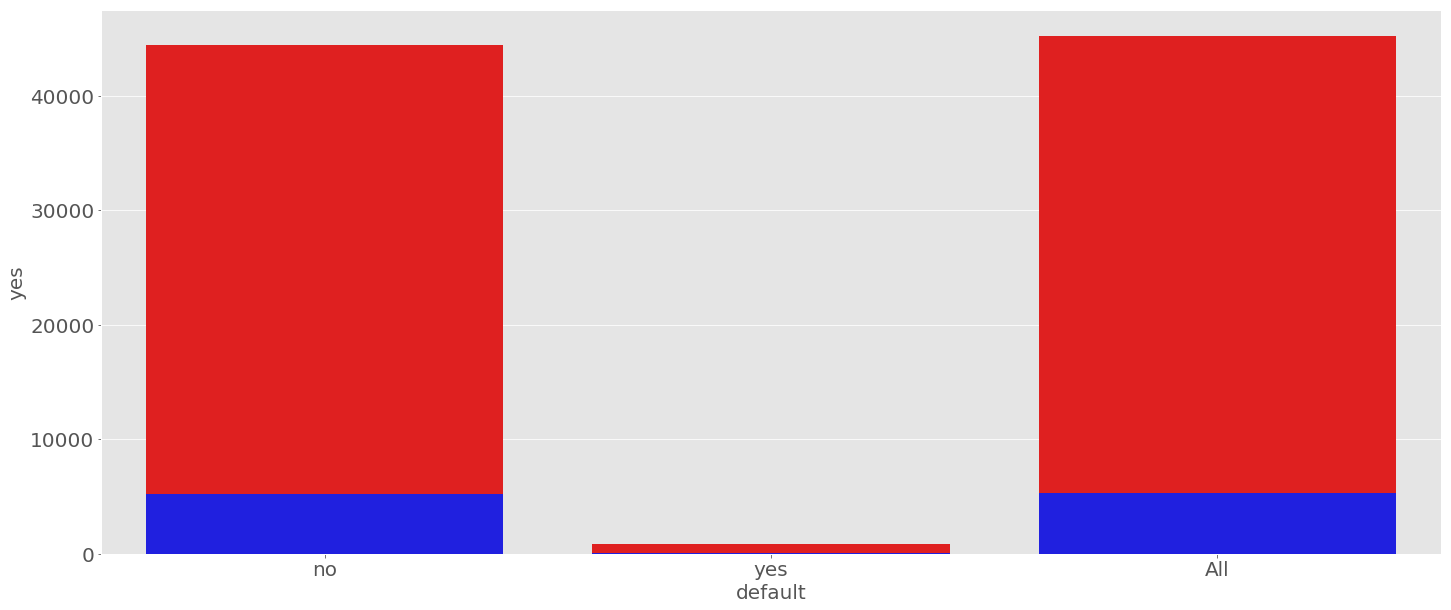

In [89]:
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_default['default'], 
            y = df_default.All, color = "red")

default_plot = sns.barplot(x = df_default['default'], 
            y = df_default.yes, color = "blue")

for item in ([default_plot.xaxis.label, default_plot.yaxis.label] +
             default_plot.get_xticklabels() + default_plot.get_yticklabels()):
    item.set_fontsize(20)

#Though majority of the people is in default no group, it is still valuable to keep this feature since the difference
#between the yes and no group is big.

In [74]:
#check how balance correlate with target
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [135]:
balance_bin = np.arange(-10000,150000,5000)
#print ('balance_bin',balance_bin)
balance_label = balance_bin[:len(balance_bin)-1]
#print ('balance_label',balance_label)
df['binned_balance'] = pd.cut(df['balance'], bins=balance_bin, labels=balance_label)

#df.groupby('binned_balance').count()
df_balance = pd.crosstab(df.binned_balance, df.y, margins=True)
df_balance
df_pivot_table = pd.pivot_table(df, index=df.binned_balance, columns=df.y, aggfunc='count')
df_pivot_table
# df_balance.reset_index(inplace = True)
# df_balance['percentage'] = df_balance.yes/df_balance.All*100
# df_balance = df_balance.iloc[:20,:]
# df_balance.sort_values(by ='binned_balance', inplace = True)
# df_balance

# df_default = pd.crosstab(df.default, df.y, margins=True)
# df_default.reset_index(inplace = True)
# df_default['percentage'] = df_default.yes/df_default.All*100
# df.head(10)

df.to_csv(path_or_buf='df.csv')

#crosstab counting result does not match groupby result, fix it later

In [122]:
df['add_100000'] = df['balance'] + 100000

In [123]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,binned_age,binned_balance,binned_campaign,binned_previous,binned_balance_2,add_100000
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,50,0,0,-5,a0,102143
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,40,0,0,-5,a0,100029
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,30,0,0,-5,a0,100002
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,40,0,0,-5,a0,101506
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,30,0,0,-5,a0,100001


In [130]:
print(len(balance_label))
balance_label_2 = np.asarray(['a-10', 'a-5', 'a0', 'a5', 'a10', 'a15', 'a20', 'a25', 'a30', 'a35', 'a40', 'a45',
                  'a50', 'a55', 'a60', 'a65', 'a70', 'a75', 'a80', 'a85', 'a90', 'a95', 'a100', 'a105', 
                  'a110', 'a115', 'a120', 'a125', 'a130', 'a135', 'a140'])
print(len(balance_label_2))
print(balance_bin)
df['binned_balance_2'] = pd.cut(df['add_100000'], bins=balance_bin, labels=balance_label)
pd.crosstab(df.binned_balance_2, df.binned_balance, margins=True)

31
31
[-10000  -5000      0   5000  10000  15000  20000  25000  30000  35000
  40000  45000  50000  55000  60000  65000  70000  75000  80000  85000
  90000  95000 100000 105000 110000 115000 120000 125000 130000 135000
 140000 145000]


binned_balance,-5000,0,5000,10000,15000,20000,25000,30000,35000,45000,55000,All
binned_balance_2,,,,,,,,,,,,
100000.0,0,2,0,0,0,0,0,0,0,0,0,2.0
95000.0,7278,0,0,0,0,0,0,0,0,0,0,7278.0
110000.0,0,0,0,35086,0,0,0,0,0,0,0,35086.0
105000.0,0,0,2016,0,0,0,0,0,0,0,0,2016.0
120000.0,0,0,0,0,0,478,0,0,0,0,0,478.0
NaN,0,0,0,0,0,0,0,0,0,158,0,NaN
115000.0,0,0,0,0,0,0,0,0,0,0,96,158.0
125000.0,0,0,0,0,45,0,0,0,0,0,0,96.0
135000.0,0,0,0,0,0,0,11,0,0,0,0,45.0


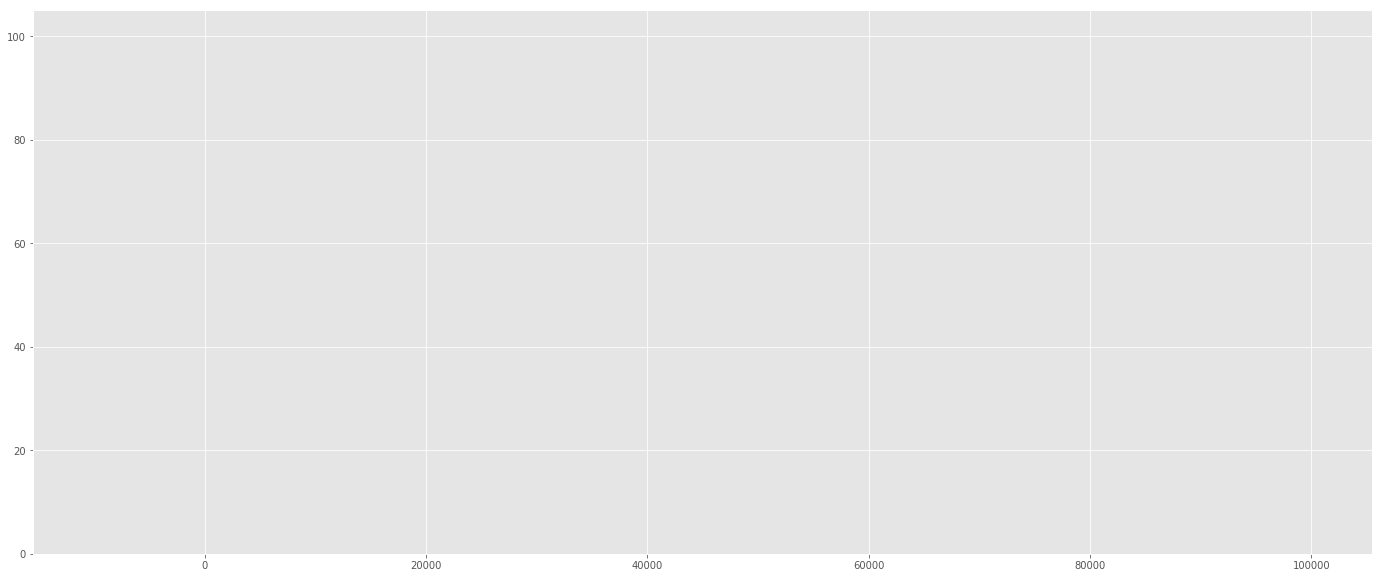

In [89]:
balance_percentage_plot = plt.bar(df_balance.binned_balance, df_balance.percentage)

In [92]:
df.sort_values(by = 'balance', ascending = False).head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,binned_age,binned_balance
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no,50,100000
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no,50,95000
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes,80,80000
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes,80,80000
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no,50,70000
19785,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0,unknown,no,50,65000
21192,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no,50,65000
19420,59,admin.,married,unknown,no,64343,no,no,cellular,6,aug,45,4,-1,0,unknown,no,50,60000
41374,32,entrepreneur,single,tertiary,no,59649,no,no,cellular,1,sep,69,2,-1,0,unknown,no,30,55000
12926,56,blue-collar,married,secondary,no,58932,no,no,telephone,7,jul,339,2,-1,0,unknown,no,50,55000


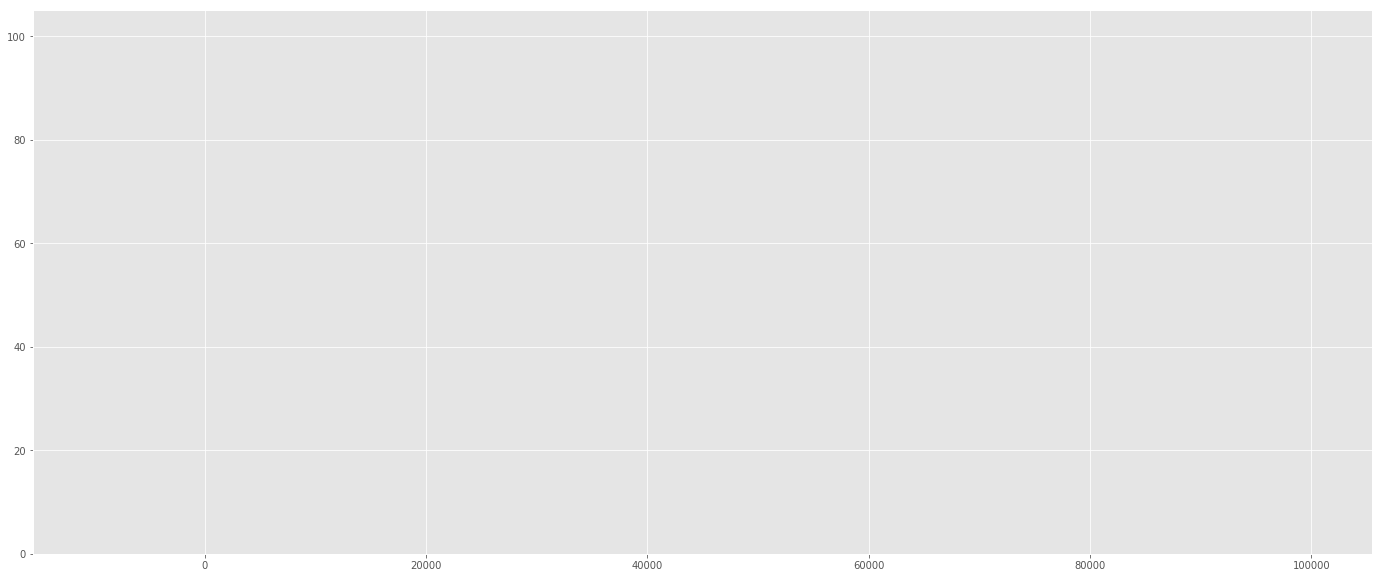

In [93]:
balance_percentage_plot = plt.bar(df_balance.binned_balance, df_balance.percentage, width=0.8, color = 'red')
sns.set_context({"figure.figsize": (24, 10)})

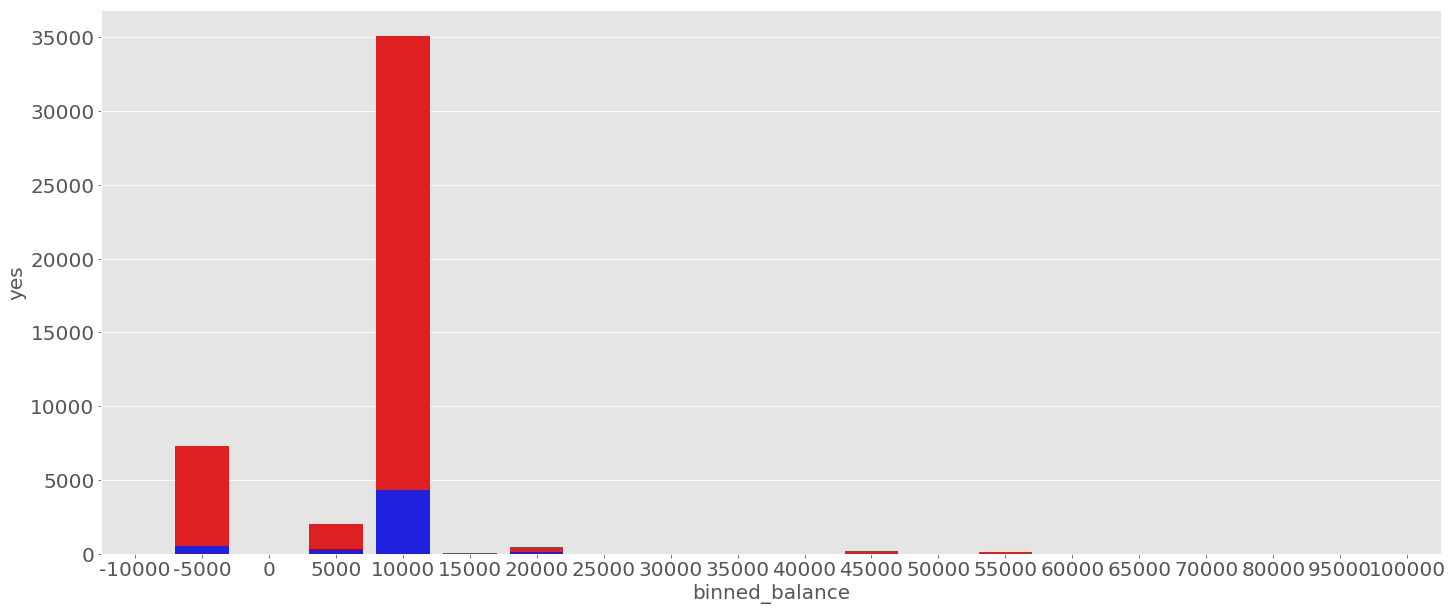

In [94]:
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_balance['binned_balance'], 
            y = df_balance.All, color = "red")

balance_plot = sns.barplot(x = df_balance['binned_balance'], 
            y = df_balance.yes, color = "blue")

for item in ([balance_plot.xaxis.label, balance_plot.yaxis.label] +
             balance_plot.get_xticklabels() + balance_plot.get_yticklabels()):
    item.set_fontsize(20)
#the yes rate vary quite a lot between different balance group

In [95]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,binned_age,binned_balance
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30,0


In [42]:
#investigate the percentage of yes in each housing catergory
df_housing = pd.crosstab(df.housing, df.y, margins=True)
df_housing.reset_index(inplace = True)
df_housing['percentage'] = df_housing.yes/df_housing.All*100
df_housing
#The yes rate is quite different between different housing group

y,housing,no,yes,All,percentage
0,no,16727,3354,20081,16.702355
1,yes,23195,1935,25130,7.699960
2,All,39922,5289,45211,11.698480


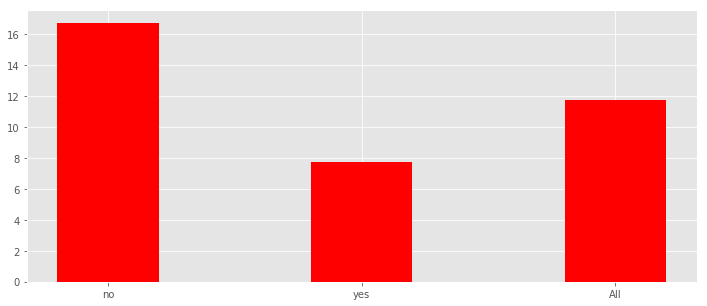

In [45]:
housing_percentage_plot = plt.bar(df_housing.housing, df_housing.percentage, width=0.4, color = 'red')
sns.set_context({"figure.figsize": (12, 5)})

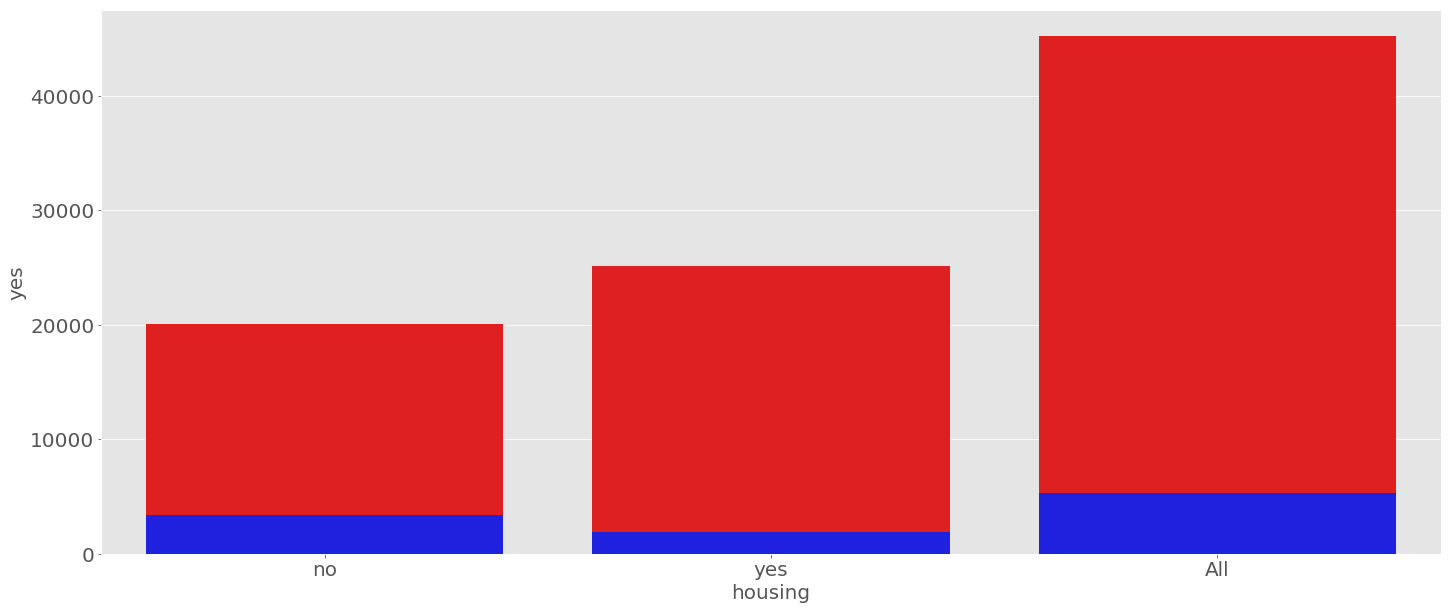

In [46]:
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = df_housing.housing, 
            y = df_housing.All, color = "red")

housing_plot = sns.barplot(x = df_housing.housing, 
            y = df_housing.yes, color = "blue")

for item in ([housing_plot.xaxis.label, housing_plot.yaxis.label] +
             housing_plot.get_xticklabels() + housing_plot.get_yticklabels()):
    item.set_fontsize(20)

Similar number from with and w/o houisng group, but percentage of subsribtion is very different. An important feature
to keep. 

In [47]:
#investigate the percentage of yes in each loan catergory
df_loan = pd.crosstab(df.loan, df.y, margins=True)
df_loan.reset_index(inplace = True)
df_loan['percentage'] = df_loan.yes/df_loan.All*100
df_loan
#The yes rate is quite different between different loan group, so loan is a good feature to keep

y,loan,no,yes,All,percentage
0,no,33162,4805,37967,12.655727
1,yes,6760,484,7244,6.681391
2,All,39922,5289,45211,11.698480


In [48]:
#investigate the percentage of yes in each contact catergory
df_contact = pd.crosstab(df.contact, df.y, margins=True)
df_contact.reset_index(inplace = True)
df_contact['percentage'] = df_contact.yes/df_contact.All*100
df_contact
#The yes rate is quite different between different contact group, especially when contact is unknown it is 
#significantly lower than the other group

y,contact,no,yes,All,percentage
0,cellular,24916,4369,29285,14.918900
1,telephone,2516,390,2906,13.420509
2,unknown,12490,530,13020,4.070661
3,All,39922,5289,45211,11.698480


In [52]:
df.sort_values(by ='campaign', ascending  = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,binned_age,binned_balance,binned_campaign
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no,40,5000,60
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no,20,0,55
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no,30,0,50
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no,20,0,50
18713,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no,30,0,45


In [49]:
df.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [54]:
df.campaign.value_counts()


1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [51]:
#The range is between 0 and 63
bins = np.arange(0,70,5)
labels = np.arange(0,70,5)[:len(bins)-1]
df['binned_campaign'] = pd.cut(df['campaign'], bins=bins, labels=labels)

df_campaign = pd.crosstab(df.binned_campaign, df.y, margins=True)
df_campaign.reset_index(inplace = True)
df_campaign['percentage'] = df_campaign.yes/df_campaign.All*100
df_campaign

df_campaign = df_campaign.iloc[:13,:]
df_campaign.sort_values(by ='binned_campaign', inplace = True)
df_campaign

#the yes rate vary quite different between different campaign group
# The previous campaign is a good feature to keep

y,binned_campaign,no,yes,All,percentage
0,0,35820,5036,40856,12.326219
1,5,2953,206,3159,6.521051
2,10,632,34,666,5.105105
3,15,277,9,286,3.146853
4,20,120,2,122,1.639344
9,25,3,0,3,0.000000
5,30,62,1,63,1.587302
11,35,1,0,1,0.000000
6,40,35,1,36,2.777778
10,45,2,0,2,0.000000


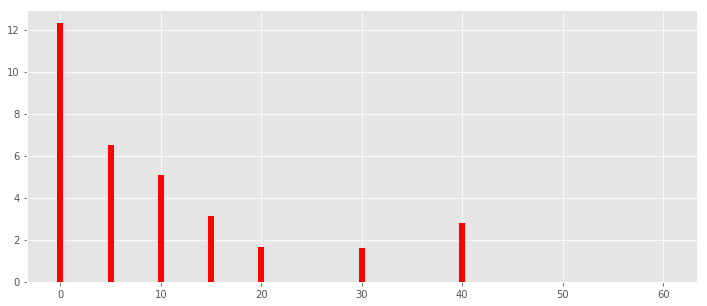

In [56]:
campaign_percentage_plot = plt.bar(df_campaign.binned_campaign, df_campaign.percentage, width=0.6, color = 'red')
sns.set_context({"figure.figsize": (12, 5)})

#not necessary the more the campaign the better...

In [103]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [57]:
df.previous.value_counts()
#most people have been contacted 0 time before

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [58]:
#investigate the percentage of yes in each previous catergory
df_previous = pd.crosstab(df.previous, df.y, margins=True)
df_previous.reset_index(inplace = True)
df_previous['percentage'] = df_previous.yes/df_previous.All*100
df_previous


y,previous,no,yes,All,percentage
0,0,33570,3384,36954,9.157331
1,1,2189,583,2772,21.031746
2,2,1650,456,2106,21.652422
3,3,848,294,1142,25.744308
4,4,543,171,714,23.949580
5,5,338,121,459,26.361656
6,6,194,83,277,29.963899
7,7,151,54,205,26.341463
8,8,90,39,129,30.232558
9,9,68,24,92,26.086957


In [71]:
#the 275 is an outlier, will create bins that not include this number
bins = np.arange(-5,65,5)
labels = np.arange(-5,65,5)[:len(bins)-1]
df['binned_previous'] = pd.cut(df['previous'], bins=bins, labels=labels)

df_previous = pd.crosstab(df.binned_previous, df.y, margins=True)
df_previous.reset_index(inplace = True)
df_previous['percentage'] = df_previous.yes/df_previous.All*100
df_previous

df_previous = df_previous.iloc[:12,:]
df_previous.sort_values(by ='binned_previous', inplace = True)
df_previous

#the yes rate vary quite different between different previous group
# The previous is a good feature to keep

y,binned_previous,no,yes,All,percentage
0,-5,33570,3384,36954.0,9.157331
1,0,5568,1625,7193.0,22.591408
4,5,47,6,53.0,11.320755
2,10,544,226,770.0,29.350649
3,15,146,40,186.0,21.505376
5,20,24,3,27.0,11.111111
6,25,13,3,16.0,18.750000
11,30,0,1,2.0,50.000000
7,35,2,0,2.0,0.000000
8,50,5,0,5.0,0.000000


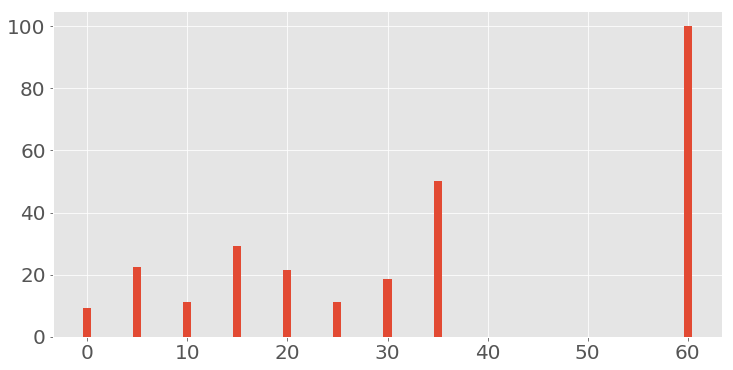

In [113]:
plt.figure(figsize = (12,6))

plt.bar(df_previous.binned_previous, df_previous.percentage)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('previous.svg', format= 'svg')

In [106]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,binned_age,binned_balance,binned_campaign,binned_previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,50,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,40,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,30,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,40,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,30,0,0,0


In [60]:
#investigate the percentage of yes in each poutcome catergory
df_poutcome = pd.crosstab(df.poutcome, df.y, margins=True)
df_poutcome.reset_index(inplace = True)
df_poutcome['percentage'] = df_poutcome.yes/df_poutcome.All*100
df_poutcome
#the sucess rate of poutcome has important indication for the sucess, however most people are in the unknown group

y,poutcome,no,yes,All,percentage
0,failure,4283,618,4901,12.609671
1,other,1533,307,1840,16.684783
2,success,533,978,1511,64.725347
3,unknown,33573,3386,36959,9.161503
4,All,39922,5289,45211,11.698480


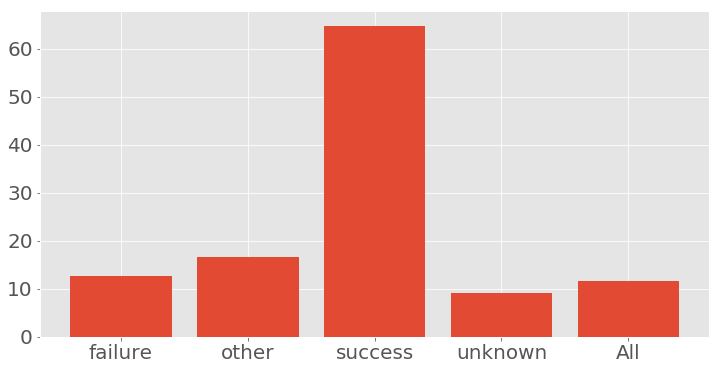

In [62]:
plt.figure(figsize = (12,6))

plt.bar(df_poutcome.poutcome, df_poutcome.percentage)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('previous.svg', format= 'svg')

Job, education, contanct and poutcome catergory have unknown values. In job and education, unknown does not 
affect many data, so clean it up. However, in contact and poutcome there are quite a lot a unknown, can not get rid of that.

Last contact day and month are not relavant to what we try to predict
Duration happens after the object pick up the phone, shouldn't include in features for prediction. Otherwise will
make the model leaky.
As discussed, pdays overlaps with previous contact.
In job catergory, admin is very similar to management, will combine.

In [64]:
#put marriage back
def DataCleanup(dataframe):
    df_1 = dataframe.copy()
    df_1 = df_1.drop(df_1[df_1['job'] == 'unknown'].index)
    df_1 = df_1.drop(df_1[df_1['education'] == 'unknown'].index)
    df_1.drop(['day', 'month','pdays','duration'],axis = 1,inplace = True)
    df_1['job'].replace('admin.','management', inplace = True)
    return df_1

In [65]:
df_raw  = pd.read_csv('bank_full_1.csv')

In [66]:
df_raw.shape

(45211, 17)

In [67]:
df_clean = DataCleanup(df_raw)

In [68]:
df_clean.shape

(43193, 13)

In [69]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,1,0,unknown,no


In [70]:
#check whether is any nan value in the numeric variable
df_clean.isnull().values.any()

False

In [73]:
#binned the numeric variable, use the bin that had been explored
def BinnedNumeric(dataframe):
    
    df = dataframe.copy()
    age_bin = np.arange(10,110,10)
    age_label = np.arange(10,110,10)[:len(age_bin)-1]
    df['binned_age'] = pd.cut(df['age'], bins=age_bin, labels=age_label)
    
    balance_bin = np.arange(-10000,150000,5000)
    balance_label = np.arange(-10000,150000,5000)[:len(balance_bin)-1]
    df['binned_balance'] = pd.cut(df['balance'], bins=balance_bin, labels=balance_label)
    
    campain_bin = np.arange(0,70,5)
    campain_label = np.arange(0,70,5)[:len(campain_bin)-1]
    df['binned_campaign'] = pd.cut(df['campaign'], bins=campain_bin, labels=campain_label)
    
    previous_bin = np.arange(-5,65,5)
    previous_label = np.arange(-5,65,5)[:len(previous_bin)-1]
    df['binned_previous'] = pd.cut(df['previous'], bins=previous_bin, labels=previous_label)
    
    df_1 = df.drop(['age','balance','campaign','previous'], axis = 1)
    return df_1

In [74]:
df_new_bin = BinnedNumeric(df_clean)

In [11]:
#df_binned = BinnedNumeric(df_clean)

In [75]:
df_new_bin.head()

,job,marital,education,default,housing,loan,contact,poutcome,y,binned_age,binned_balance,binned_campaign,binned_previous
0,management,married,tertiary,no,yes,no,unknown,unknown,no,50,0,0,-5
1,technician,single,secondary,no,yes,no,unknown,unknown,no,40,0,0,-5
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,no,30,0,0,-5
5,management,married,tertiary,no,yes,no,unknown,unknown,no,30,0,0,-5
6,management,single,tertiary,no,yes,yes,unknown,unknown,no,20,0,0,-5


In [76]:
def GetDummy(dataframe):
    df_dummy = dataframe.copy()
    for column in dataframe.columns:
        dummies = pd.get_dummies(df_dummy[column],drop_first=True).rename(columns=lambda x: column + '_' + str(x))
        df_dummy = pd.concat([df_dummy, dummies], axis=1)
        df_dummy.drop([column], inplace=True, axis=1)
    
    return df_dummy

In [77]:
df_new_bin_get_dummy = GetDummy(df_new_bin)

In [78]:
df_new_bin_get_dummy.shape

(43193, 84)

In [ ]:
df_new_bin_get_dummy.to_pickle('1026_data_for_modeling.csv')

Data is now ready for modeling after cleaning and basic binning. Below is some more data exploration with feature crossing. Some feature crossing help to improve the performace on training set, but not on the test set. It is unfortunate that some of the pattern is only in training set not in test set. 

In [79]:
df_binned_loan_balance = df_new_bin.copy()
df_binned_loan_balance['str_binned_balance'] = df_binned_loan_balance['binned_balance'].apply(lambda x: str(x))
df_binned_loan_balance['loan_balance'] =  df_binned_loan_balance[['loan','str_binned_balance']].apply(lambda x: ' '.join(x), axis=1)
df_binned_loan_balance.drop(['loan','binned_balance', 'str_binned_balance'],inplace = True, axis =1)
df_binned_loan_balance.head()


,job,marital,education,default,housing,contact,poutcome,y,binned_age,binned_campaign,binned_previous,loan_balance
0,management,married,tertiary,no,yes,unknown,unknown,no,50,0,-5,no 0
1,technician,single,secondary,no,yes,unknown,unknown,no,40,0,-5,no 0
2,entrepreneur,married,secondary,no,yes,unknown,unknown,no,30,0,-5,yes 0
5,management,married,tertiary,no,yes,unknown,unknown,no,30,0,-5,no 0
6,management,single,tertiary,no,yes,unknown,unknown,no,20,0,-5,yes 0


In [80]:
df_balance_loan = pd.crosstab(df_binned_loan_balance.loan_balance, df_binned_loan_balance.y, margins=True)
df_balance_loan.reset_index(inplace = True)
df_balance_loan['percentage'] = df_balance_loan.yes/df_balance_loan.All*100
df_balance_loan
#most people don't have loan and are in 0 balance bin. 
#crossing feature also get rid of some useless feature. For example some balance bin has no people, and by crossing it 
#with loan info it took care of it. 

y,loan_balance,no,yes,All,percentage
0,no -5000,4890,384,5274,7.281001
1,no 0,24567,3764,28331,13.285800
2,no 10000,348,83,431,19.257541
3,no 100000,1,0,1,0.000000
4,no 15000,125,13,138,9.420290
5,no 20000,78,11,89,12.359551
6,no 25000,34,8,42,19.047619
7,no 30000,7,3,10,30.000000
8,no 35000,12,1,13,7.692308
9,no 40000,7,0,7,0.000000


In [81]:
df_binned_loan_poutcome = df_new_bin.copy()
df_binned_loan_poutcome['loan_outcome'] =  df_binned_loan_poutcome[['loan','poutcome']].apply(lambda x: ' '.join(x), axis=1)
df_binned_loan_poutcome.drop(['loan','poutcome'],inplace = True, axis =1)
df_binned_loan_poutcome.head()

,job,marital,education,default,housing,contact,y,binned_age,binned_balance,binned_campaign,binned_previous,loan_outcome
0,management,married,tertiary,no,yes,unknown,no,50,0,0,-5,no unknown
1,technician,single,secondary,no,yes,unknown,no,40,0,0,-5,no unknown
2,entrepreneur,married,secondary,no,yes,unknown,no,30,0,0,-5,yes unknown
5,management,married,tertiary,no,yes,unknown,no,30,0,0,-5,no unknown
6,management,single,tertiary,no,yes,unknown,no,20,0,0,-5,yes unknown


In [82]:
df_loan_poutcome = pd.crosstab(df_binned_loan_poutcome.loan_outcome, df_binned_loan_poutcome.y, margins=True)
df_loan_poutcome.reset_index(inplace = True)
df_loan_poutcome['percentage'] = df_loan_poutcome.yes/df_loan_poutcome.All*100
df_loan_poutcome

y,loan_outcome,no,yes,All,percentage
0,no failure,3416,531,3947,13.453256
1,no other,1238,275,1513,18.175810
2,no success,471,875,1346,65.007429
3,no unknown,26413,2867,29280,9.791667
4,yes failure,706,56,762,7.349081
5,yes other,243,18,261,6.896552
6,yes success,36,42,78,53.846154
7,yes unknown,5649,357,6006,5.944056
8,All,38172,5021,43193,11.624569


In [83]:
df_binned_house_age = df_new_bin.copy()
df_binned_house_age['str_age'] = df_binned_house_age['binned_age'].apply(lambda x: str(x))
df_binned_house_age['age_house_combined'] =  df_binned_house_age[['str_age','housing']].apply(lambda x: ' '.join(x), axis=1)
df_binned_house_age.drop(['housing','binned_age','str_age'],inplace = True, axis =1)
df_binned_house_age.head()

,job,marital,education,default,loan,contact,poutcome,y,binned_balance,binned_campaign,binned_previous,age_house_combined
0,management,married,tertiary,no,no,unknown,unknown,no,0,0,-5,50 yes
1,technician,single,secondary,no,no,unknown,unknown,no,0,0,-5,40 yes
2,entrepreneur,married,secondary,no,yes,unknown,unknown,no,0,0,-5,30 yes
5,management,married,tertiary,no,no,unknown,unknown,no,0,0,-5,30 yes
6,management,single,tertiary,no,yes,unknown,unknown,no,0,0,-5,20 yes


In [84]:
df_house_age = pd.crosstab(df_binned_house_age.age_house_combined, df_binned_house_age.y, margins=True)
df_house_age.reset_index(inplace = True)
df_house_age['percentage'] = df_house_age.yes/df_house_age.All*100
df_house_age

y,age_house_combined,no,yes,All,percentage
0,10 no,37,17,54,31.481481
1,10 yes,10,2,12,16.666667
2,20 no,2067,700,2767,25.298157
3,20 yes,3574,372,3946,9.427268
4,30 no,5296,910,6206,14.663229
5,30 yes,10125,847,10972,7.719650
6,40 no,3999,540,4539,11.896894
7,40 yes,5691,416,6107,6.811855
8,50 no,3782,554,4336,12.776753
9,50 yes,2980,205,3185,6.436421


In [85]:
df_binned_housing_loan = df_new_bin.copy()
df_binned_housing_loan['housing_loan_combined'] = df_binned_housing_loan[['housing','loan']].apply(lambda x: ' '.join(x), axis=1)
df_binned_housing_loan.drop(['housing','loan'],inplace = True, axis =1)
df_binned_housing_loan.head()


,job,marital,education,default,contact,poutcome,y,binned_age,binned_balance,binned_campaign,binned_previous,housing_loan_combined
0,management,married,tertiary,no,unknown,unknown,no,50,0,0,-5,yes no
1,technician,single,secondary,no,unknown,unknown,no,40,0,0,-5,yes no
2,entrepreneur,married,secondary,no,unknown,unknown,no,30,0,0,-5,yes yes
5,management,married,tertiary,no,unknown,unknown,no,30,0,0,-5,yes no
6,management,single,tertiary,no,unknown,unknown,no,20,0,0,-5,yes yes


In [87]:
df_house_loan = pd.crosstab(df_binned_housing_loan.housing_loan_combined, df_binned_housing_loan.y, margins=True)
df_house_loan.reset_index(inplace = True)
df_house_loan['percentage'] = df_house_loan.yes/df_house_loan.All*100
df_house_loan

y,housing_loan_combined,no,yes,All,percentage
0,no no,13154,2931,16085,18.221946
1,no yes,2600,216,2816,7.670455
2,yes no,18384,1617,20001,8.084596
3,yes yes,4034,257,4291,5.989280
4,All,38172,5021,43193,11.624569


The percentage of subscription with no personal nor housing loan is almost 3 times as the ones with both.

In [88]:
df_binned_cross_age_education = df_new_bin.copy()
df_binned_cross_age_education['str_age'] = df_binned_cross_age_education['binned_age'].apply(lambda x: str(x))
df_binned_cross_age_education['age_education_combined'] = df_binned_cross_age_education[['str_age','education']].apply(lambda x: ' '.join(x), axis=1)
df_binned_cross_age_education.drop(['education','binned_age','str_age'],inplace = True, axis =1)
df_binned_cross_age_education.head()

,job,marital,default,housing,loan,contact,poutcome,y,binned_balance,binned_campaign,binned_previous,age_education_combined
0,management,married,no,yes,no,unknown,unknown,no,0,0,-5,50 tertiary
1,technician,single,no,yes,no,unknown,unknown,no,0,0,-5,40 secondary
2,entrepreneur,married,no,yes,yes,unknown,unknown,no,0,0,-5,30 secondary
5,management,married,no,yes,no,unknown,unknown,no,0,0,-5,30 tertiary
6,management,single,no,yes,yes,unknown,unknown,no,0,0,-5,20 tertiary


In [89]:
df_age_education = pd.crosstab(df_binned_cross_age_education.age_education_combined, df_binned_cross_age_education.y, margins=True)
df_age_education.reset_index(inplace = True)
df_age_education['percentage'] = df_age_education.yes/df_age_education.All*100
df_age_education

y,age_education_combined,no,yes,All,percentage
0,10 primary,12,6,18,33.333333
1,10 secondary,32,13,45,28.888889
2,10 tertiary,3,0,3,0.000000
3,20 primary,445,48,493,9.736308
4,20 secondary,3477,589,4066,14.485981
5,20 tertiary,1719,435,2154,20.194986
6,30 primary,1741,109,1850,5.891892
7,30 secondary,8470,803,9273,8.659549
8,30 tertiary,5210,845,6055,13.955409
9,40 primary,1999,132,2131,6.194275


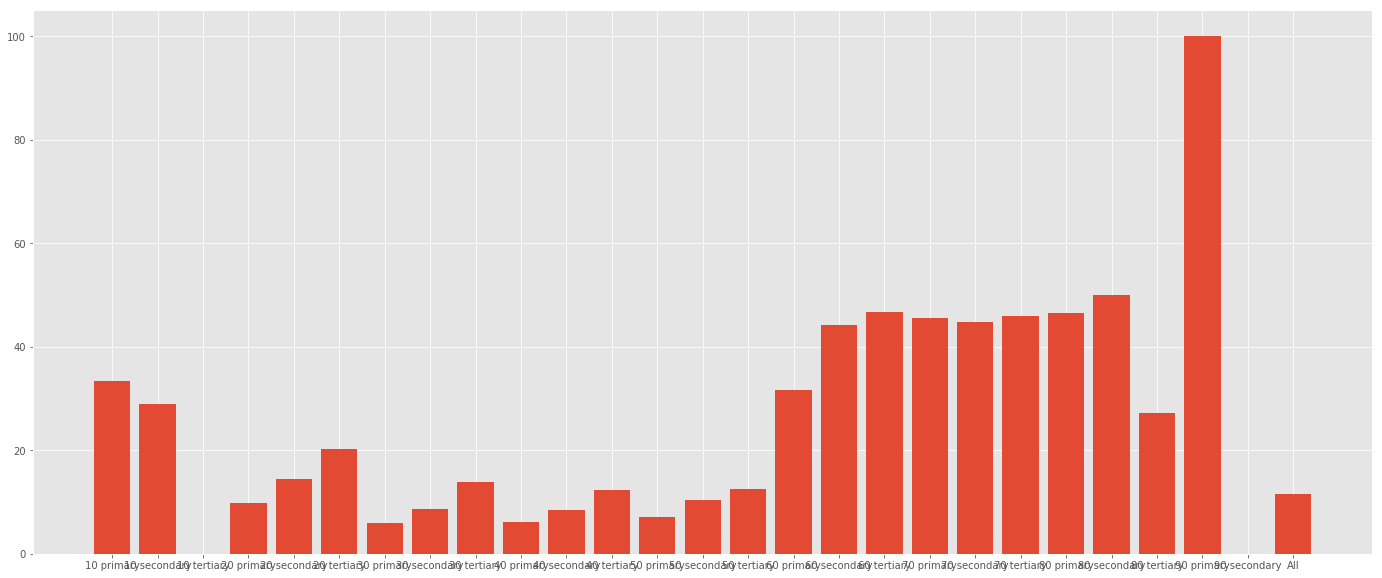

In [90]:
sns.set_context({"figure.figsize": (24, 10)})

education_age_percentage_plot = plt.bar(df_age_education.age_education_combined, df_age_education.percentage)


Create a bunch of dataframe that contain crossing features.

In [92]:
df_binned_loan_balance_dummy = GetDummy(df_binned_loan_balance)

In [79]:
df_binned_loan_balance_dummy.to_pickle('loan_balance.pkl')

In [93]:
df_loan_poutcome = GetDummy(df_binned_loan_poutcome)

In [64]:
df_loan_poutcome.to_pickle('loan_poutcome.pkl')

In [94]:
df_house_age_dummy = GetDummy(df_binned_house_age)

In [58]:
df_house_age_dummy.to_pickle('combine_age_housing.pkl')

In [95]:
df_dummy_age_education_combine = GetDummy(df_binned_cross_age_education)

In [46]:
df_dummy_age_education_combine.to_pickle('combine_age_education.pkl')

In [96]:
df_get_dummy_housing_loan = GetDummy(df_binned_housing_loan)

In [51]:
df_get_dummy_housing_loan.to_pickle('df_housing_loan.pkl')